# Feature Tracking
Various feature tracking algorithms

In [118]:
import numpy as np
from scipy import ndimage as nd
import math
from PIL import Image
import matplotlib.pyplot as plt

In [119]:
# Gradient in x-direction
def Sobelx(image):
    sobelx = np.array([[1,0,-1],
                    [2,0,-2],
                    [1,0,-1]])
    Ix = nd.convolve(image,sobelx)           
    return Ix


# Gradient in y-direction
def Sobely(image):
    sobely = np.array([[ 1, 2, 1],
                    [ 0, 0, 0],
                    [-1,-2,-1]])

    Iy = nd.convolve(image,sobely)
    return Iy


# Convert RGB to grayscale
def rgb2gray(image):
    image = np.array(image)
    r, c, ch = image.shape
    gray = np.zeros([r,c])

    gray = np.mean(image, axis=2)
    return gray


# Reduce image size
def reduceRes(image,factor):
    r,c = image.size
    r = np.int(np.floor(r/factor))
    c = np.int(np.floor(c/factor))
    new = image.resize((r,c))
    return new


# Box filter for smoothing
def boxFilter(rc):
    box = np.ones([rc,rc])/rc**2
    return box


In [120]:
# Load image
file = 'edges.jpg'
im = Image.open(file)

# Reduce resolution
im = reduceRes(im,5)

# Convert to grayscale
gray = rgb2gray(im)

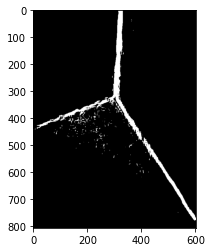

In [125]:
# Smooth image
smooth = nd.convolve(gray,boxFilter(11))

# Find gradients
Ix = Sobelx(smooth)
Iy = Sobely(smooth)
mag = np.sqrt(Ix**2+Iy**2)

threshold = 0.25
mask = 1*( mag >= threshold*np.amax(mag))

# Show Image
plt.imshow(mask, cmap='gray')

# SIFT
The scale-invariant feature transform (SIFT) is a computer vision algorithm to detect, describe, and match local features in images, invented by David Lowe in 1999.[1] Applications include object recognition, robotic mapping and navigation, image stitching, 3D modeling, gesture recognition, video tracking, individual identification of wildlife and match moving. 

In [122]:
# SIFT